<a href="https://colab.research.google.com/github/jisusP/Data_science/blob/main/Ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/jisusP/Data_science/main/retail_sales_dataset.csv"
#url = "/content/retail_sales_dataset.csv"
df = pd.read_csv(url)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
df.isnull().sum() #Cuenta la cantidad de valores nulos que hay por columnas.

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
df.info

<bound method DataFrame.info of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount

In [ ]:
df.describe() #Muestra toda la parte estadística del dataset

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
serie_edad_mean = df.groupby(df["Quantity"])["Age"].mean()
df.groupby(df["Quantity"]).mean()

<ipython-input-9-e79ecb78ac50>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df["Quantity"]).mean()


,Transaction ID,Age,Price per Unit,Total Amount
Quantity,,,,
1,525.142292,41.557312,177.094862,177.094862
2,477.292181,42.436214,166.769547,333.539095
3,505.796680,40.290456,199.564315,598.692946
4,493.384030,41.277567,176.673004,706.692015


<Axes: xlabel='Quantity'>

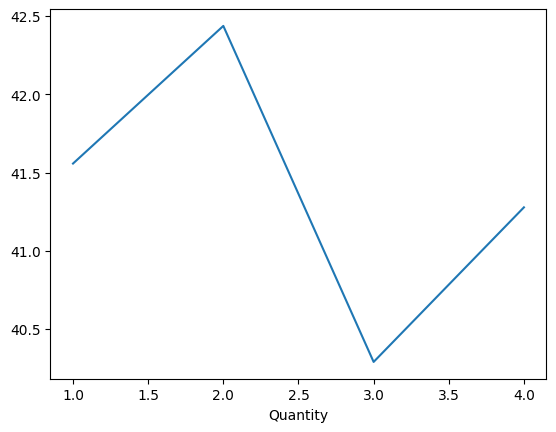

In [ ]:
serie_edad_mean.plot()

In [ ]:
df_p = pd.DataFrame({'A': ['foo', 'bar', 'foo','bar'], 'B': ['one', 'one', 'two', 'two'], 'C': [1,2, 2, 3]})
df_p = df_p.drop_duplicates(subset=['A', 'B'])
pivot = pd.pivot_table(df_p, values='C', index='A',columns='B', aggfunc=np.sum)
pivot
#pivot = pd.pivot_table(df, values="Price per Unit", index="Quantity", columns="Age", aggfunc=np.sum())
#En mi caso, los valores no convergen por no tener el mismo tamaño (esa es la premisa)

B,one,two
A,,
bar,2,3
foo,1,2


In [ ]:
df.groupby(df["Age"]).sum()
#Lo que hace groupby es agrupar según la columna que se le pase, y si esta se repite varias veces...
#tomará la suma de cada uno (en sus respectivas columnas).
#Tomemos el caso de la edad "23": Nos muestra valores distintos al df original, por lo que nuestra premisa puede ser correcta...
#Hagamos una prueba con el precio por unidad para aquellos que tengan 23 años, que debería ser igual al siguiente código:
#df[df["Age"]==23]["Price per Unit"].sum()
#Observamos que 3735 es igual para los 2, demostrándose así nuestra hipótesis.

<ipython-input-3-5c9188f205b2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df["Age"]).sum()


,Transaction ID,Quantity,Price per Unit,Total Amount
Age,,,,
18,8224,54,4325,11215
19,9695,57,5220,14870
20,10841,47,2850,8645
21,9020,50,5005,12585
22,11833,65,5090,13700
23,10674,57,3735,8220
24,9076,36,1735,5415
25,9468,46,4475,9900
26,12029,53,5765,13980


<ipython-input-2-641aa8874f2e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr(method="pearson")


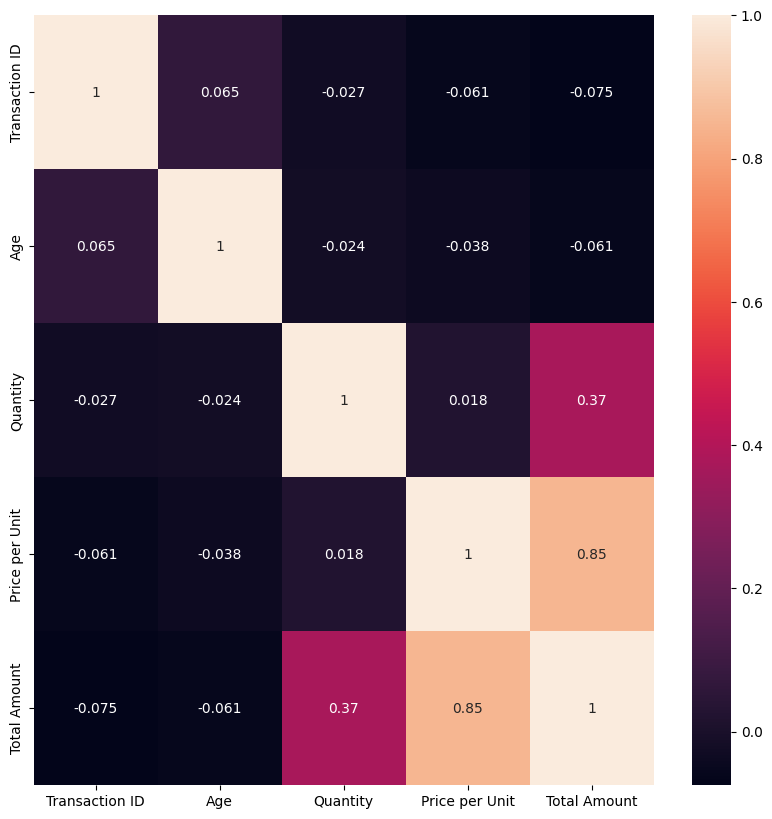

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df = df.corr(method="pearson")
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True)
plt.show()

<Axes: >

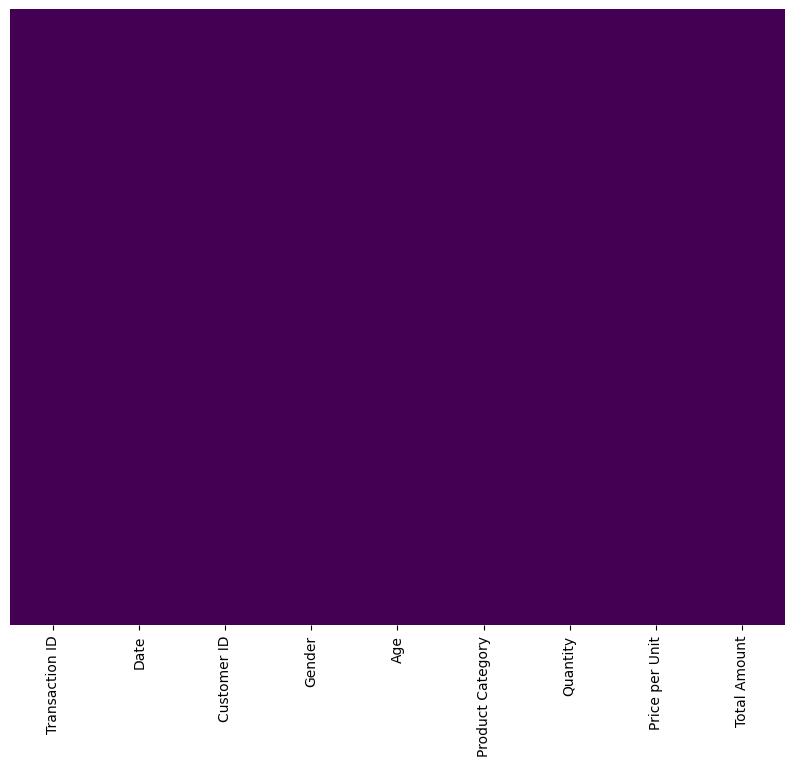

In [3]:
#Para visualizar valores faltantes
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
#Como este dataframe está completo, no tiene valores faltantes, entonces no sale ninguna raya amarilla

<Axes: xlabel='Age', ylabel='Count'>

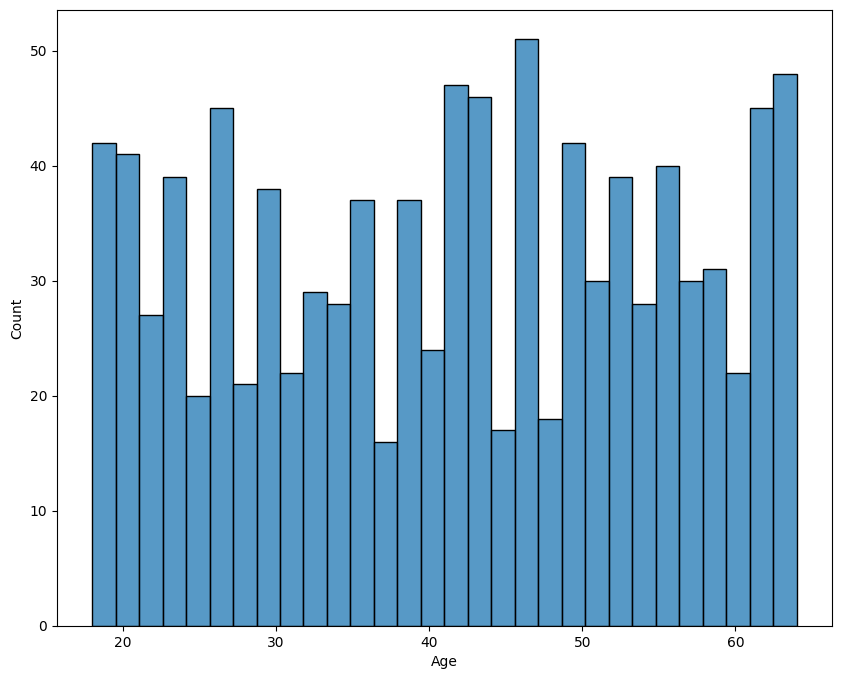

In [4]:
#Histogramas para columnas en específico:
plt.figure(figsize=(10,8))
sns.histplot(df["Age"].dropna(), kde=False, bins=30)

<Axes: xlabel='Total Amount', ylabel='count'>

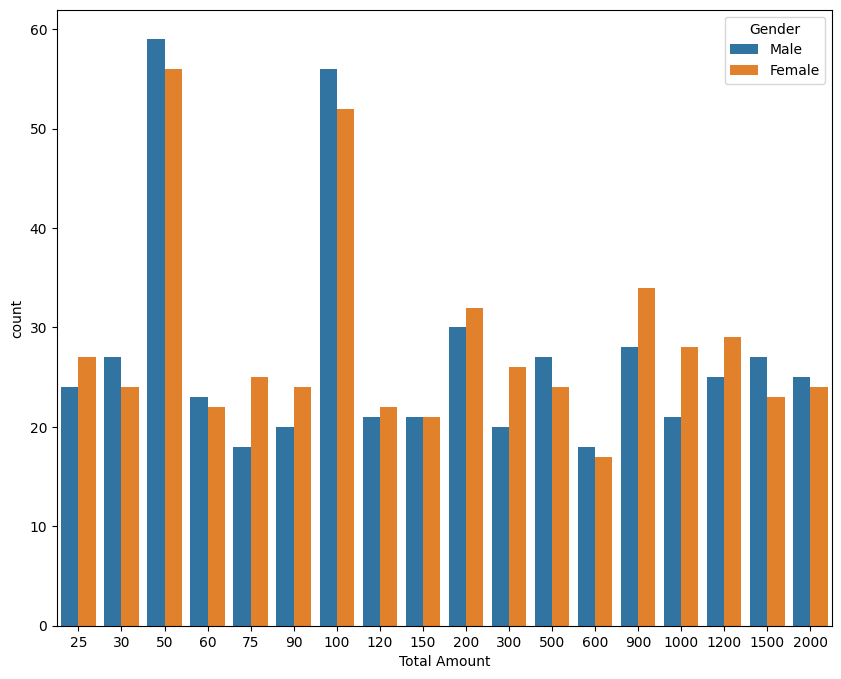

In [7]:
#Análisis de gráfico por género, ¿quién compra más?:
plt.figure(figsize=(10,8))
sns.countplot(x="Total Amount", hue="Gender", data=df)

<Axes: xlabel='Quantity', ylabel='Age'>

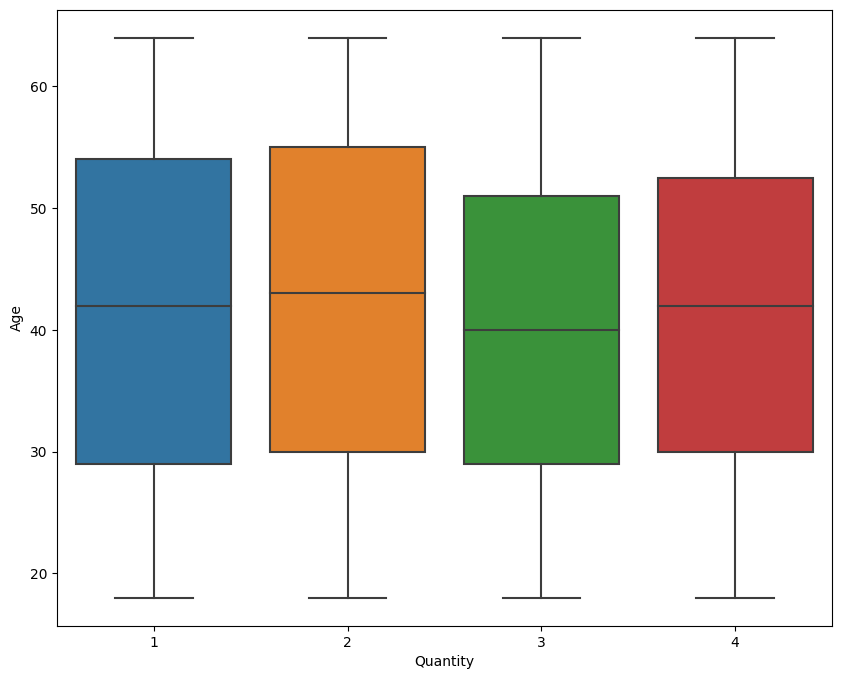

In [9]:
#Relación entre la edad y la cantidad de compras:
plt.figure(figsize=(10,8))
sns.boxplot(x="Quantity", y="Age", data=df)
#Los puntos que salgan afuera del intervalo, se consideran datos anómalos según la varianza (en este caso no hay)

In [14]:
#Vamos a transformar las variables categóricas en variables numéricas, con sklearn
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
#Otra manera de convertir a género en datos numéricos.
# df["Gender"] = df["Gender"].map({"Male:0, Female:1"})
df["Customer ID"] = encoder.fit_transform(df["Customer ID"])
#En este caso, convertimos hombre en 0, y mujeres en 1
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total_log
0,1,2023-11-24,0,1,34,Beauty,3,50,150,5.010635
1,2,2023-02-27,1,0,26,Clothing,2,500,1000,6.907755
2,3,2023-01-13,2,1,50,Electronics,1,30,30,3.401197
3,4,2023-05-21,3,1,37,Clothing,1,500,500,6.214608
4,5,2023-05-06,4,1,30,Beauty,2,50,100,4.605170
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,996,1,62,Clothing,1,50,50,3.912023
996,997,2023-11-17,997,1,52,Beauty,3,30,90,4.499810
997,998,2023-10-29,998,0,23,Beauty,4,25,100,4.605170
998,999,2023-12-05,999,0,36,Electronics,3,50,150,5.010635


In [13]:
#Transformación de datos logarítmicos: para reducir datos con alta variabilidad
df["Total_log"] = df['Total Amount'].apply(np.log)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total_log
0,1,2023-11-24,0,1,34,Beauty,3,50,150,5.010635
1,2,2023-02-27,1,0,26,Clothing,2,500,1000,6.907755
2,3,2023-01-13,2,1,50,Electronics,1,30,30,3.401197
3,4,2023-05-21,3,1,37,Clothing,1,500,500,6.214608
4,5,2023-05-06,4,1,30,Beauty,2,50,100,4.605170
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,996,1,62,Clothing,1,50,50,3.912023
996,997,2023-11-17,997,1,52,Beauty,3,30,90,4.499810
997,998,2023-10-29,998,0,23,Beauty,4,25,100,4.605170
998,999,2023-12-05,999,0,36,Electronics,3,50,150,5.010635


In [22]:
#Para obtener los valores únicos de una columna, o las variables sin repetirse y saber cuántas hay, se puede hacer con nunique() y unique()
valor = df['Product Category'].unique()
total = df['Product Category'].nunique()
print(f"Hay {total} variables categóricas, y son estas: {valor}")

#Cambiemos de categórico a numérico
df["Product Category"] = df["Product Category"].map({'Beauty':0, 'Clothing':1, 'Electronics':2})
df

Hay 3 variables categóricas, y son estas: ['Beauty' 'Clothing' 'Electronics']


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total_log
0,1,2023-11-24,0,1,34,0,3,50,150,5.010635
1,2,2023-02-27,1,0,26,1,2,500,1000,6.907755
2,3,2023-01-13,2,1,50,2,1,30,30,3.401197
3,4,2023-05-21,3,1,37,1,1,500,500,6.214608
4,5,2023-05-06,4,1,30,0,2,50,100,4.605170
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,996,1,62,1,1,50,50,3.912023
996,997,2023-11-17,997,1,52,0,3,30,90,4.499810
997,998,2023-10-29,998,0,23,0,4,25,100,4.605170
998,999,2023-12-05,999,0,36,2,3,50,150,5.010635


In [31]:
#Eliminación de outliers, o valores atípicos en el conjunto de datos (esto se debe eliminar cuando ya se tenga estudiado la base de la información)
#Habíamos eliminado con anticipación a Date, por no ser entero
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtro_entrada = (abs_z_scores < 3).all(axis=1)
df1 = df[filtro_entrada]
print("Dataframe después de eliminar los outliers: ")
df1


Dataframe después de eliminar los outliers: 


,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total_log
0,1,0,1,34,0,3,50,150,5.010635
1,2,1,0,26,1,2,500,1000,6.907755
2,3,2,1,50,2,1,30,30,3.401197
3,4,3,1,37,1,1,500,500,6.214608
4,5,4,1,30,0,2,50,100,4.605170
...,...,...,...,...,...,...,...,...,...
995,996,996,1,62,1,1,50,50,3.912023
996,997,997,1,52,0,3,30,90,4.499810
997,998,998,0,23,0,4,25,100,4.605170
998,999,999,0,36,2,3,50,150,5.010635


In [32]:
scaler = MinMaxScaler()
df1_normalizado = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
df1_normalizado

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total_log
0,0.000000,0.000000,1.0,0.347826,0.0,0.666667,0.052632,0.063291,0.408888
1,0.001001,0.001001,0.0,0.173913,0.5,0.333333,1.000000,0.493671,0.841820
2,0.002002,0.002002,1.0,0.695652,1.0,0.000000,0.010526,0.002532,0.041607
3,0.003003,0.003003,1.0,0.413043,0.5,0.000000,1.000000,0.240506,0.683641
4,0.004004,0.004004,1.0,0.260870,0.0,0.333333,0.052632,0.037975,0.316359
...,...,...,...,...,...,...,...,...,...
995,0.995996,0.996997,1.0,0.956522,0.5,0.000000,0.052632,0.012658,0.158180
996,0.996997,0.997998,1.0,0.739130,0.0,0.666667,0.010526,0.032911,0.292315
997,0.997998,0.998999,0.0,0.108696,0.0,1.000000,0.000000,0.037975,0.316359
998,0.998999,1.000000,0.0,0.391304,1.0,0.666667,0.052632,0.063291,0.408888


In [23]:
#Vamos con el aprendizaje supervisado. regresión logística
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

x = df[["Quantity", "Gender", "Price per Unit"]] #Características
y = df["Product Category"] #Objetivo

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Creación y entrenamiento del modelo
model = LogisticRegression()
model.fit(x_train, y_train)

#Predicción
prediction = model.predict(x_test)

print("Acurracy:", accuracy_score(y_test, prediction))
print("Confusion Matrix: ", confusion_matrix(y_test, prediction))
print("Classification report: ", classification_report(y_test, prediction))

Acurracy: 0.24
Confusion Matrix:  [[ 0 42 31]
 [ 0 22 38]
 [ 0 41 26]]
Classification report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.21      0.37      0.27        60
           2       0.27      0.39      0.32        67

    accuracy                           0.24       200
   macro avg       0.16      0.25      0.20       200
weighted avg       0.15      0.24      0.19       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df, *['Gender', 'Product Category'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['Product Category'], **{})
chart